<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Linear_Algebra/Linear_algebra_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

In [166]:
import numpy as np

# 1.

**Laplace's Theorem** is a method for calculating the determinant of a square matrix, particularly useful for matrices of order greater than 2. This theorem is based on the expansion of the determinant by the elements of any row or column.


$$
\det(A) = \sum_{j=1}^n (-1)^{1+j} a_{1j} M_{1j}
$$

where:
- $a_{1j}$ is the element in the first row and column $j$.
- $M_{1j}$ is the minor associated with element $a_{1j}$, i.e., the determinant of the submatrix obtained by removing row 1 and column $j$.
- $(-1)^{1+j}$ is the sign corresponding to the cofactor of element $a_{1j}$.

We can implement a recursive function for determinant calculation, knowing that the determinant of a 1×1 matrix is its only element, and for matrices of higher order it is the sum of each element in a row or column multiplied by their cofactors. In the recursive function we will use the same defined function, calculating through complementary minors. An example expanded along the first row would be:

$$
   \det (A_{j,j}) =
   \left \{
   \begin{array}{llcl}
      si & j = 1 & \to & a_{1,1} \\
                                 \\
      si & j > 1 & \to & \displaystyle \sum_{k=1}^j \; (-1)^{(1+k)} \cdot a_{1,k} \cdot \det( \alpha_{1,k})
   \end{array}
   \right .
$$

Create a function that finds the determinant of a matrix using the recursive approach described here, and explicitly explain your code.

In [167]:
def laplace_determinant(matrix):
    """
    Calculates the determinant of a square matrix using Laplace's Theorem (cofactor expansion).
    
    Parameters:
    matrix (list of list of float): A square matrix represented as a list of lists.
    
    Returns:
    float: The determinant of the matrix.
    """
    n = len(matrix)  # Size of the matrix (n x n)
    
    # Base case: if matrix is 1x1, determinant is the single element
    if n == 1:
        return matrix[0][0]
    
    # Base case: if matrix is 2x2, use direct formula
    if n == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    # Initialize determinant
    det = 0
    
    # Expand along first row
    for j in range(n):
        # Calculate complementary minor (submatrix without row 0 and column j)
        submatrix = [row[:j] + row[j+1:] for row in matrix[1:]]
        
        # Calculate cofactor: (-1)^(1+j) * a_{1j} * det(submatrix)
        cofactor = ((-1) ** j) * matrix[0][j] * laplace_determinant(submatrix)
        
        # Add cofactor to determinant
        det += cofactor
    
    return det

# Usage example
A = [
    [6, 1, 1],
    [4, -2, 5],
    [2, 8, 7]
]

# Calculate determinant using the function
det_A = laplace_determinant(A)
print("The determinant of A is:", det_A)

# Verify with NumPy

det_np = np.linalg.det(A)
print("The determinant of A (using NumPy) is:", det_np)

The determinant of A is: -306
The determinant of A (using NumPy) is: -306.0



# 2.

<center>

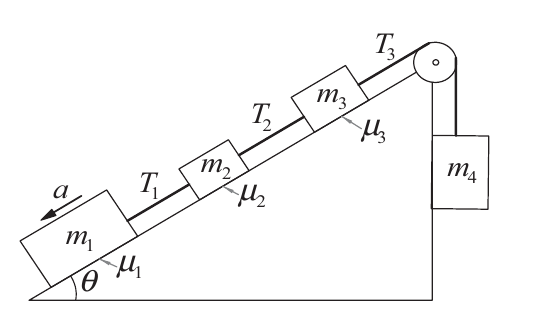

</center>

Four blocks of different masses $m_i$ are connected by strings of negligible mass. Three of the blocks lie on an inclined plane with an angle $\theta$, where the coefficients of friction between the blocks and the plane are $\mu_i$. The equations of motion for the system are:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

where:
- $T_i$ represent the tensions in the strings.
- $a$ is the acceleration of the system.
- $\theta = 45^\circ$ is the angle of inclination.
- $g = 9.81 m/s^2$ is the gravitational acceleration.


Determine $a$ and $T_i$

**Data:**

Masses of the blocks:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coefficients of friction:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [168]:
# Problem data
m = np.array([10, 4, 5, 6])  # masses in kg
mu = np.array([0.25, 0.3, 0.2])  # friction coefficients
theta = np.radians(45)  # angle in radians
g = 9.81  # gravitational acceleration

# Coefficient matrix A
A = np.array([
    [1, 0, 0, m[0]],
    [-1, 1, 0, m[1]],
    [0, -1, 1, m[2]],
    [0, 0, -1, m[3]]
])

# Independent terms vector b
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)

b = np.array([
    m[0] * g * (sin_theta - mu[0] * cos_theta),
    m[1] * g * (sin_theta - mu[1] * cos_theta),
    m[2] * g * (sin_theta - mu[2] * cos_theta),
    -m[3] * g
])

# Solve the system
x = np.linalg.solve(A, b)

# Extract tensions and acceleration
T1, T2, T3, a = x

# Display results
print("Solution:")
print(f"Tension T1: {T1:.2f} N")
print(f"Tension T2: {T2:.2f} N")
print(f"Tension T3: {T3:.2f} N")
print(f"Acceleration a: {a:.2f} m/s²")

Solution:
Tension T1: 35.89 N
Tension T2: 48.86 N
Tension T3: 68.54 N
Acceleration a: 1.61 m/s²


# 3.
Consider the circuit in the figure. Using Kirchhoff's laws, write the equations for current and voltage. Then, determine the matrix form and find the values of the current flowing through each node, i.e., $i_{12}$, $i_{23}$ and so on.

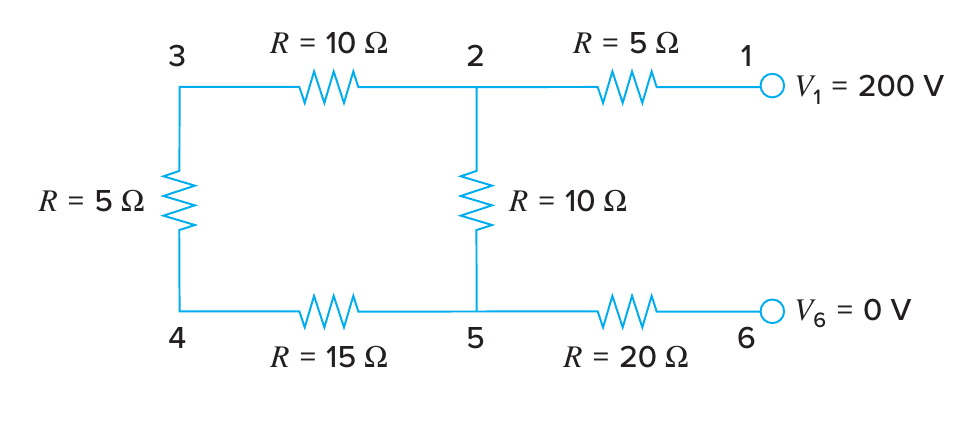

$$i_{12}-i_{23}-i_{25}=0$$
$$i_{23}-i_{34}=0$$
$$i_{34}-i_{45}=0$$
$$i_{45}-i_{25}-i_{56}=0$$
$$R_1 i_{12}+R_5 i_{25}+R_6 i_{56}=200$$
$$R_5 i_{25}-R_2 i_{23}-R_3 i_{34}-R_4 i_{45}=0$$

In [169]:
# Define resistor values and voltage sources
R1 = 5  # Ohm
R2 = 10  # Ohm
R3 = 5  # Ohm
R4 = 15  # Ohm
R5 = 10  # Ohm
R6 = 20  # Ohm
V1 = 200  # In volts

# Define the coefficient matrix (A) and the independent terms vector (B)
A = np.array([
    [1, -1, 0, 0, 0, -1],   # Node 1
    [0, 1, -1, 0, 0, 0],    # Node 2
    [0, 0, 1, -1, 0, 0],    # Node 3
    [0, 0, 0, 1, -1, 1],    # Node 4    
    [R1, 0, 0, 0, R6, R5],  # Mesh 1 
    [0, -R2, -R3, -R4, 0, R5] # Mesh 2   
])

B = np.array([0, 0, 0, 0, V1, 0])

# Solve the system of linear equations
currents = np.linalg.solve(A, B)

# Display the results
i12, i23, i34, i45, i56, i25 = currents
print(f"Current i12: {i12:.3f} A")
print(f"Current i23: {i23:.3f} A")
print(f"Current i34: {i34:.3f} A")
print(f"Current i45: {i45:.3f} A")
print(f"Current i56: {i56:.3f} A")
print(f"Current i25: {i25:.3f} A")

Current i12: 6.154 A
Current i23: 1.538 A
Current i34: 1.538 A
Current i45: 1.538 A
Current i56: 6.154 A
Current i25: 4.615 A


# 4. 
Consider the following matrix $\mathbf{A}$:

$$\mathbf{A} = \begin{pmatrix} 2 & 3 & 1 \\ 4 & 7 & 3 \\ 6 & 18 & 5 \end{pmatrix}$$

- Calculate the $\mathbf{LU}$ factorization of matrix $\mathbf{A}$, where $\mathbf{L}$ is a lower triangular matrix with ones on the diagonal, and $\mathbf{U}$ is an upper triangular matrix.
- Use the $\mathbf{LU}$ factorization obtained in the previous step to find the inverse matrix $\mathbf{A}^{-1}$. To do this, solve the following two matrix systems, based on the equation $\mathbf{L}\mathbf{U}\mathbf{A}^{-1} = \mathbf{I}$, where $\mathbf{I}$ is the $3 \times 3$ identity matrix:
    - Solve $\mathbf{L}\mathbf{Z} = \mathbf{I}$ for the intermediate matrix $\mathbf{Z}$.
    - Solve $\mathbf{U}\mathbf{A}^{-1} = \mathbf{Z}$ for the inverse matrix $\mathbf{A}^{-1}$.

In [170]:
def lu_decomposition(A):
    """
    Calculates the LU factorization of matrix A, where L is a lower triangular 
    matrix with ones on the diagonal, and U is an upper triangular matrix.
    
    This function implements Doolittle's algorithm (L has ones on the diagonal).
    No pivoting is used, so the function may fail if a zero pivot is encountered.
    
    Parameters:
    A (numpy.ndarray) : Square coefficient matrix (n x n).

    Returns:
    L (numpy.ndarray) : Lower triangular matrix with ones on the diagonal. 
    U (numpy.ndarray): Upper triangular matrix.
    """
    n = A.shape[0]
    # Initialize L as identity and U as a copy of A.
    U = A.astype(float).copy() 
    L = np.eye(n, dtype=float)
    
    for k in range(n-1):
        # Check for zero pivot (required for non-pivoting LU)
        if abs(U[k, k]) < 1e-15:
            # For a full implementation, this would require partial pivoting.
            raise ValueError("LU decomposition failed: zero pivot encountered.")

        for i in range(k + 1, n):
            # Calculate the multiplier (L[i, k])
            factor = U[i, k] / U[k, k]
            L[i, k] = factor # Store factor in L
            
            # Perform row operation on U (eliminating U[i, k] to zero)
            U[i, k:] = U[i, k:] - factor * U[k, k:]
            
    # U is the upper triangular part of the modified A.
    # L is constructed from the factors.
    return L, U

In [171]:
def solve_lower_triangular(L, b):
    """
    Solves the system Lx = b for x using Forward Substitution.
    
    Parameters:
    L (numpy.ndarray): Lower triangular matrix (n x n).
    b (numpy.ndarray): Right-hand side vector or matrix (n, m or n,).
    
    Returns:
    x (numpy.ndarray): Solution vector.
    """
    n = L.shape[0]

    x = np.zeros_like(b, dtype=float)
    for i in range(n):
        # L[i, i] is 1 
        # x[i] = (b[i] - sum(L[i, j] * x[j] for j in 0 to i-1)) / L[i, i]
        x[i] = b[i] - np.dot(L[i, :i], x[:i])
    return x



In [172]:

def solve_upper_triangular(U, b):
    """
    Solves the system Ux = b for x using Back Substitution.
    
    Parameters:
    U (numpy.ndarray): Upper triangular matrix (n x n). 
    b (numpy.ndarray): Right-hand side vector or matrix (n, m or n,).
        
    Returns:
    x (numpy.ndarray): Solution vector.
    """
    n = U.shape[0]
    x = np.zeros_like(b, dtype=float)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

In [173]:
def inverse_via_lu(A):
    """
    Calculates the inverse of matrix A using LU factorization.
    
    Parameters:
    A (numpy.ndarray): Square matrix (n x n).
    
    Returns:
    A_inv (numpy.ndarray): The inverse matrix A^{-1}. 
    L (numpy.ndarray): Lower triangular matrix.  
    U (numpy.ndarray): Upper triangular matrix.  
    Z (numpy.ndarray): Intermediate matrix Z.
    """
    n = A.shape[0]
    I = np.eye(n, dtype=float)
    
    # 1. LU Decomposition
    L, U = lu_decomposition(A)
    
    # 2. Solve L*Z = I for Z (Forward Substitution)
    Z = solve_lower_triangular(L, I)
    
    # 3. Solve U*A_inv = Z for A_inv (Back Substitution)
    A_inv = solve_upper_triangular(U, Z)
    
    return A_inv, L, U, Z

In [174]:
A = np.array([
    [2, 3, 1], 
    [4, 7, 3], 
    [6, 18, 5]
])

In [175]:
A_inv, L, U, Z = inverse_via_lu(A)

print("U Factorization of A")
print("Lower Triangular Matrix L:")
print(L)
print("Upper Triangular Matrix U:")
print(U)
print(f"Intermediate Matrix Z: ")
print(Z)

print("Inverse Matrix A⁻¹")
print(A_inv)

# For comparison, calculate inverse using the provided standard NumPy function
A_inv_np = np.linalg.inv(A)
print("Inverse calculated by numpy.linalg.inv for comparison:")
print(A_inv_np)

U Factorization of A
Lower Triangular Matrix L:
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 9. 1.]]
Upper Triangular Matrix U:
[[ 2.  3.  1.]
 [ 0.  1.  1.]
 [ 0.  0. -7.]]
Intermediate Matrix Z: 
[[ 1.  0.  0.]
 [-2.  1.  0.]
 [15. -9.  1.]]
Inverse Matrix A⁻¹
[[ 1.35714286 -0.21428571 -0.14285714]
 [ 0.14285714 -0.28571429  0.14285714]
 [-2.14285714  1.28571429 -0.14285714]]
Inverse calculated by numpy.linalg.inv for comparison:
[[ 1.35714286 -0.21428571 -0.14285714]
 [ 0.14285714 -0.28571429  0.14285714]
 [-2.14285714  1.28571429 -0.14285714]]


# 5.
The Jacobi method rewrites the system $ Ax = b $ by decomposing the matrix $ A $ as:

$$
A = D + L + U,
$$

where:
- $ D $: Diagonal matrix of $ A $.
- $ L $: Lower triangular matrix without the diagonal.
- $ U $: Upper triangular matrix without the diagonal.

The system is reorganized as:

$$
x = D^{-1}(b - (L + U)x).
$$

This is implemented iteratively as:

$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j \neq i} a_{ij} x_j^{(k)}\right),
$$

where $ a_{ii} $ are the diagonal elements of $ A $.

- Write an explicit function that iteratively performs this method with a tolerance of 1e-7 and a maximum of 100 iterations. Define clear documentation that explains the methods used, the inputs and outputs

- For a random 5 $\times$ 5 matrix, find the solution using your function and determine the error with respect to `np.linalg.solve` and the matrix inverse method.

In [176]:
def jacobi(A, b, tol=1e-7, max_iter=100):
    """
    Solves the system of linear equations Ax = b using the Jacobi method.

    Parameters:
    A (numpy.ndarray): Coefficient matrix of size n x n.
    b (numpy.ndarray): Independent terms vector of size n.
    tol (float): Convergence tolerance (default 1e-7).
    max_iter (int): Maximum number of iterations (default 100).

    Returns:
    x (numpy.ndarray): Approximate solution of the system.
    iterations (int): Number of iterations performed.
    """
    n = len(b)  # System size
    x = np.random.rand(n)  # Initialization of the solution vector
    
    # Decomposition of A into D, L and U
    D = np.diag(np.diag(A))  # Diagonal matrix
    L_plus_U = A - D  # Matrix L + U
    
    # Jacobi method iterations
    for iteration in range(max_iter):
        x_new = np.linalg.inv(D)@(b - L_plus_U@x)
        
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
    
    return x_new, iteration + 1


In [177]:
def jacobi_component(A, b, tol= 1e-7, max_iter= 100):
    """
    Solves a system of linear equations Ax = b using the Jacobi iterative method,
    explicitly implementing the component-wise formula.

    Convergence is typically guaranteed if the matrix A is strictly diagonally dominant.

    Args:
        A (numpy.ndarray): Coefficient matrix of size n x n.
        b (numpy.ndarray): Independent terms vector of size n.
        tol (float): Convergence tolerance (default 1e-7).
        max_iter (int): Maximum number of iterations (default 100).

    Returns:
        A tuple containing:
        - x: The solution vector (numpy array).
        - k: The number of iterations performed.
        - error: The final L2 norm of the change in the solution vector.
    """
    n = A.shape[0]

    # --- Input Validation ---
    if A.shape != (n, n):
        raise ValueError("Matrix A must be square.")
    if b.shape != (n,):
        raise ValueError("Vector b must have the same dimension as A.")

    # Check for zero diagonal elements
    if np.any(np.diag(A) == 0):
        raise ValueError("Matrix A has zero(s) on the diagonal. Cannot perform Jacobi iteration.")

    # --- Initialization ---
    # Initialize solution vector x to all zeros
    x = np.zeros_like(b, dtype=float)

    # --- Iteration Loop ---
    for k in range(max_iter):
        x_new = np.zeros_like(x)

        # Loop over each component i to calculate x_i^(k+1)
        for i in range(n):
            # Calculate the summation term: SUM_{j != i} (a_ij * x_j^(k))
            sum_val = 0.0
            for j in range(n):
                if i != j:
                    sum_val += A[i, j] * x[j]

            # Apply the Jacobi formula for the i-th component
            # x_i^(k+1) = (1 / a_ii) * (b_i - sum_val)
            x_new[i] = (b[i] - sum_val) / A[i, i]

        # Check for convergence: L2 norm of the difference between x^(k+1) and x^(k)
        error = np.linalg.norm(x_new - x)

        if error < tol:
            return x_new, k + 1, error

        # Update x for the next iteration
        x = x_new

    # --- Non-Convergence ---
    raise RuntimeError(f"Jacobi method did not converge after {max_iter} iterations. Final error: {error:.2e}")

In [178]:
# Usage example
np.random.seed(30)
n = 5  # For reproducibility
A = np.random.rand(n, n)  # Random 5x5 matrix
A = A + n/3 * np.eye(n)  # Ensure A is diagonally dominant
b = np.random.rand(n)  # Random vector of independent terms

# Solve using the Jacobi method
x_jacobi, iterations = jacobi(A, b)
print("Solution using Jacobi:")
print(x_jacobi)
print(f"Iterations performed: {iterations}")

# Solve using np.linalg.solve (exact solution)
x_exact = np.linalg.solve(A, b)
print("\nExact solution (np.linalg.solve):")
print(x_exact)

# Solve using the inverse method
x_inverse = np.linalg.inv(A)@b
print("\nSolution using the matrix inverse:")
print(x_inverse)

# Calculate errors
error_jacobi = np.linalg.norm(x_jacobi - x_exact)
error_inverse = np.linalg.norm(x_jacobi - x_inverse)

print("\nError with respect to np.linalg.solve:")
print(f"Error relative to solve: {error_jacobi}")
print(f"Error relative to inverse: {error_inverse}")

Solution using Jacobi:
[ 0.02399689  0.19737068  0.10376859 -0.07465053  0.10310298]
Iterations performed: 100

Exact solution (np.linalg.solve):
[ 0.02399684  0.19737065  0.10376855 -0.07465057  0.10310294]

Solution using the matrix inverse:
[ 0.02399684  0.19737065  0.10376855 -0.07465057  0.10310294]

Error with respect to np.linalg.solve:
Error relative to solve: 8.424862135592863e-08
Error relative to inverse: 8.424862135602325e-08


# 6.
Consider the following $2 \times 2$ matrix $\mathbf{A}$:

$$\mathbf{A} = \begin{pmatrix} 4 & 1 \\ 2 & 3 \end{pmatrix}$$

- Finding the Eigenvalues ($\lambda$):
    - Write the characteristic equation for $\mathbf{A}$, which is $\det(\mathbf{A} - \lambda \mathbf{I}) = 0$.
    - Solve the resulting quadratic equation to find the two eigenvalues, $\lambda_1$ and $\lambda_2$.
    
- Verification using Trace and Determinant:
    
    For a $2 \times 2$ matrix $\mathbf{A}$, the characteristic equation can also be written using the trace ($\text{Tr}(\mathbf{A})$) and the determinant ($\det(\mathbf{A})$) as:
    
    $$\lambda^2 - \text{Tr}(\mathbf{A})\lambda + \det(\mathbf{A}) = 0$$

    $$\lambda_{\pm}=\frac{\text{Tr}(\mathbf{A}) \pm \sqrt{\text{Tr}^2(\mathbf{A})- 4\det(\mathbf{A})}}{2} $$

In [179]:
A = np.array([[4, 1],
              [2, 3]])

# Eigenvalues using numpy
eigenvalues = np.linalg.eigvals(A)
print("Eigenvalues from numpy:", eigenvalues)

# Manually:
trace = np.trace(A)
det = np.linalg.det(A)

# Characteristic equation: λ^2 - trace * λ + det = 0
D = trace**2 - 4*det
lambda1 = (trace + np.sqrt(D)) / 2
lambda2 = (trace - np.sqrt(D)) / 2
print("Eigenvalues with trace and determinant:", lambda1, lambda2)


Eigenvalues from numpy: [5. 2.]
Eigenvalues with trace and determinant: 4.999999999999999 2.000000000000001


# 7.
Consider a particle whose Hamiltonian is $ H = \begin{pmatrix} 2 & i & 0 \\ -i & 1 & 1 \\ 0 & 1 & 0 \end{pmatrix} $.

- ¿Is $H$  Hermitian?
- Find the eigenvalues (Energy) and normalized eigenvectors of $H$.

In [180]:
# Define the H matrix
H = np.array([[2, 1j, 0],
              [-1j, 1, 1],
              [0, 1, 0]], dtype=complex)

# Check if H is Hermitian
H_dagger = np.conj(H).T
is_hermitian = np.allclose(H, H_dagger)

print("Is H Hermitian?", is_hermitian)

Is H Hermitian? True


In [181]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)  # eigh is for Hermitian matrices

print("Eigenvalues (Energies):")
print(eigenvalues)

print("Normalized eigenvectors (columns):")
print(eigenvectors)

# Verify normalization
print("Normalization verification:")
for i in range(3):
    norm = np.linalg.norm(eigenvectors[:, i])
    print(f"Vector {i+1}: norm = {norm:.6f}")

Eigenvalues (Energies):
[-0.73205081  1.          2.73205081]
Normalized eigenvectors (columns):
[[-0.21132487+0.j          0.57735027-0.j         -0.78867513+0.j        ]
 [ 0.        -0.57735027j  0.        +0.57735027j  0.        +0.57735027j]
 [ 0.        +0.78867513j  0.        +0.57735027j  0.        +0.21132487j]]
Normalization verification:
Vector 1: norm = 1.000000
Vector 2: norm = 1.000000
Vector 3: norm = 1.000000
